In [1]:
from transformers import RobertaModel, RobertaTokenizer, AutoTokenizer
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from tqdm import tqdm 

plt.rcParams['figure.dpi'] = 500

## Exploration

In [2]:
%%capture
model = RobertaModel.from_pretrained('roberta-base').embeddings.word_embeddings
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
data = model.weight

In [4]:
U, S, V = torch.pca_lowrank(data, q=10)

In [110]:
data2p = torch.matmul(data, V[:, 5:7])

### Upload words

In [93]:
filename = "list_words.txt"
init_words = set(map(str.strip, open(filename).readlines()))
init_words = list(filter(lambda item: len(tokenizer.encode(item)) == 3, init_words))
print(f"number of words: {len(init_words)}")

number of words: 1617


In [115]:
words = random.sample(init_words, 50)

In [116]:
indices = torch.LongTensor([tokenizer.encode(token)[1] for token in words])

In [117]:
embeddings = [(token, data2p[idx][0].item(), data2p[idx][1].item()) for token, idx in zip(words, indices)]
embeddings = pd.DataFrame(data=embeddings, columns=["word", "x1", "x2"])

<Figure size 10000x10000 with 0 Axes>

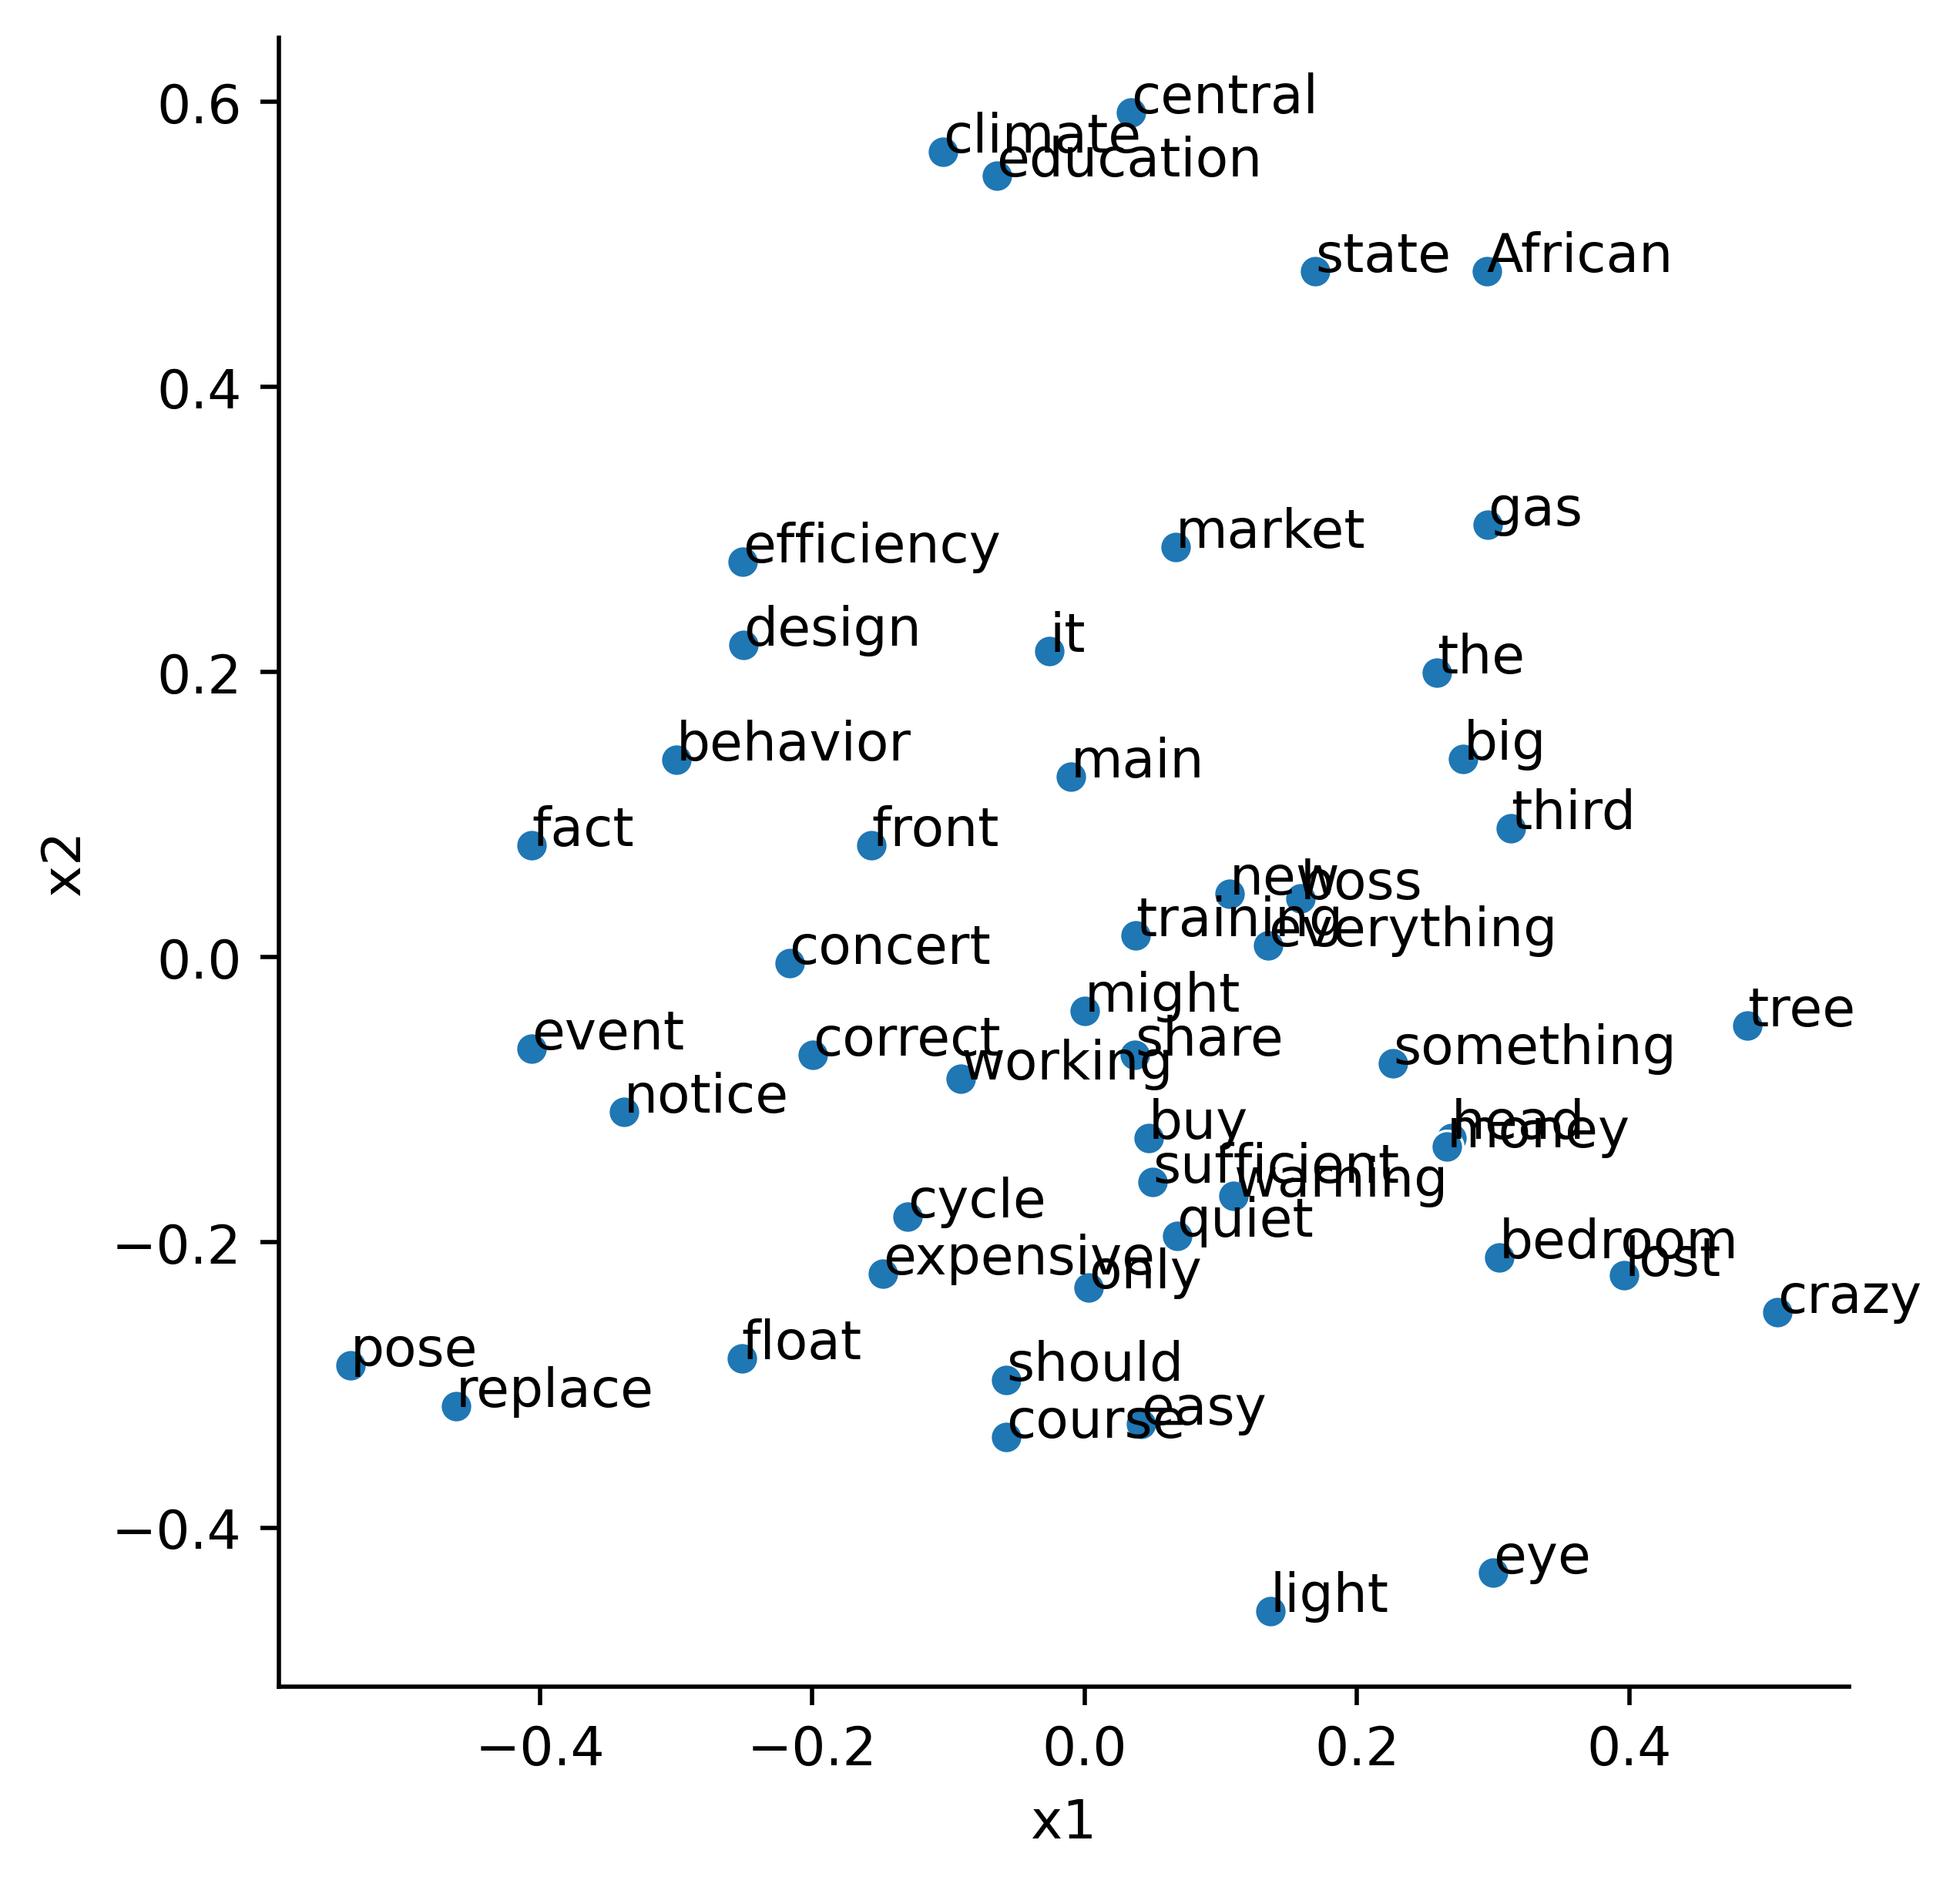

In [118]:
plt.figure(figsize=(20, 20))
sns.relplot(data=embeddings, x="x1", y="x2")
for _, row in embeddings.iterrows():
    plt.text(row["x1"], row["x2"], row["word"])